<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;"
  >
Pandas: Finding and Dropping Missing Data
              
</p>
</div>

Data Science Cohort Live NYC May 2022
<p>Phase 1: Topic 5</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### Missing data


Observations for a set of variables (columns):
- E.g, observations of octopus: length, width, mass, beak length, beak width, number of suckers, bioluminiscence, species.   
- For a given observation:  have data on some variables but not others.
- This leads to missing/empty values in tabular form.

| Obs_ID  | L (m) | W (m) | L<sub>beak</sub> (cm) | W<sub>beak</sub> (cm) | m (kg) | n<sub>suckers</sub> | Bioluminescent? | Species|
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 0 | 1.1 | .6 | 10 | 5 | 10 | | N | Ghost squid |
| 1 | 30 | 9 | 8 | 5 | 180 | 1200 | N | Giant Squid |
| 2 | 1.5 | .8 |  |  | 12 |  | Y | S. Syrtensis |

<br>

<div align = "right">
<center><img src="Images/syrtensis.jpeg" width="400"/></center>
</div>
<center>Stauroteuthis Syrtensis: The glowing octopus </center>


#### What pandas does with missing values
- On an import: missing values represented as NaNs
- NaN = not a number

Let's take a look at our titanic dataset.

In [1]:
import numpy as np
import pandas as pd
titanic_df = pd.read_csv('Data/titanic.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
titanic_df.iloc[:1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [38]:
titanic_df.loc[(titanic_df['Cabin'] == 'E46' )| (titanic_df['Sex'] == 'male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The .info() method shows us that there are some null values. Look at Cabin column:

In [2]:
titanic_df['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

There are clearly some NaNs: missing values.

Pandas type for NaN:

In [3]:
type(titanic_df.loc[0, 'Cabin'])

float

#### Placeholder Values
- Sometimes nulls are already encoded in data
    - Most common: 0 for missing values
    - A very large number: e.g. 9999 w/ data range [0,10]
    - np.inf: infinity coding
    
Typically value well outside range/type of most data values.

In [4]:
datafun = np.array( [[23, 45, 10, 22, 0, 31, 8, 6, 9999, 11, 9999],['NYC', 'NYC', 'PHIL', 'NYC', 'DC', 'BOS', 0, 'NYC', 'BOS', 0, 'DC']])
pd.DataFrame(datafun.T, columns = ['miles_driven_hour', 'car_origin_city'])

,miles_driven_hour,car_origin_city
0,23,NYC
1,45,NYC
2,10,PHIL
3,22,NYC
4,0,DC
5,31,BOS
6,8,0
7,6,NYC
8,9999,BOS
9,11,0


Find the missing values.

#### Why are missing values a problem?
- NaNs:
    - Many statistical calculations and machine learning algorithms ill posed with NaNs.
- Placeholders:
    - Distort/skew data distribution artificially (e.g., many meaningless 0 or 9999 in data)
   


#### NaNs: Finding them using pandas
- DataFrame.isna() method: returns True/False if NaN entry-wise by default.

In [5]:
titanic_df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


But often we want to know which rows or which columns have NaNs. First we need to look at:

- Series.any() method: Returns True or False on a Series if any of the elements are True.

In [6]:
pd.Series([False, False, False]).any()

False

In [7]:
pd.Series([False, True, False]).any()

True

- DataFrame.any(axis = ___) method.
- If axis = 0, check if there are any True in each column.
- If axis = 1, check if there are any True in each row.

Put it altogether by chaining:

In [42]:
titanic_df.isna()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Do the columns have NaN in it?

In [43]:
titanic_df.isna().any(axis = 0) #.sum()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Do the rows have NaN in it?

In [44]:
titanic_df.isna().any(axis = 1)

708

The .notna() method:
- Unsurprisingly, finds all elements in dataframe that are not NaNs.

In [12]:
titanic_df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
titanic_df.notna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,False,True
887,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,True,True,False,True,True,True,True,False,True
889,True,True,True,True,True,True,True,True,True,True,True,True


The DataFrame.all(axis = __) method:

- If axis = 0, checks if each column is all True.
- If axis = 1, checks if each row is all True.

Chain with .notna() and we can find all rows/columns that have no NaNs
    

In [14]:
# all columns that have no Nans
titanic_df.notna().all(axis = 0)

PassengerId     True
Survived        True
Pclass          True
Name            True
Sex             True
Age            False
SibSp           True
Parch           True
Ticket          True
Fare            True
Cabin          False
Embarked       False
dtype: bool

In [15]:
# all row that have no Nans
titanic_df.notna().all(axis = 1)

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Length: 891, dtype: bool

#### Selections on columns/rows with/without NaNs:

- Use the .loc[] accessor with .isna(), .any(), etc...
- The Series that we have been generating with .notna().all(), etc are Boolean masks!

Example: select all rows in titanic data without NaNs. Extract Sex, Passenger class, Age, and Cabin columns only.


In [16]:
col_list = ['Sex', 'Pclass', 'Age', 'Cabin']
selection = titanic_df.loc[titanic_df.notna().all(axis = 1), col_list]

print(selection.head())
print(selection.info())


       Sex  Pclass   Age Cabin
1   female       1  38.0   C85
3   female       1  35.0  C123
6     male       1  54.0   E46
10  female       3   4.0    G6
11  female       1  58.0  C103
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     183 non-null    object 
 1   Pclass  183 non-null    int64  
 2   Age     183 non-null    float64
 3   Cabin   183 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.1+ KB
None


#### Dropping NaNs easily:
- The .dropna(axis = __, how =, subset = __) 
- Above chaining with .loc flexible
- But: dropping NaNs regular enough operation that there is easy command to do this.

Drop all rows (index) that have any NaNs

In [17]:
titanic_df.dropna(axis = 'index', how = 'any')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Drop all columns that have any NaNs:

In [18]:
titanic_df.dropna(axis = 'columns', how = 'any').head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


#### Dealing with PlaceHolder Values
- One way is to convert suspected placeholder value(s) to NaN and then apply previous methods.

In [19]:
datafun_df = pd.DataFrame(datafun.T, columns = ['miles_driven_hour', 'car_origin_city'])
datafun_df

,miles_driven_hour,car_origin_city
0,23,NYC
1,45,NYC
2,10,PHIL
3,22,NYC
4,0,DC
5,31,BOS
6,8,0
7,6,NYC
8,9999,BOS
9,11,0


DataFrame.replace() method: 
- dictionary-style value replacement in a DataFrame

In [20]:
datafun_df.replace({'0':np.nan, '9999': np.nan}, inplace = True)
datafun_df

,miles_driven_hour,car_origin_city
0,23,NYC
1,45,NYC
2,10,PHIL
3,22,NYC
4,NaN,DC
5,31,BOS
6,8,NaN
7,6,NYC
8,NaN,BOS
9,11,NaN


Dropping all rows with any NaNs:

In [21]:
datafun_df.dropna(axis = 'index', how = 'any')

,miles_driven_hour,car_origin_city
0,23,NYC
1,45,NYC
2,10,PHIL
3,22,NYC
5,31,BOS
7,6,NYC


- Pandas: effective at finding and dropping missing values.

- Often dropping values is not the best way. 

We will see other possibilities next lecture.

In [100]:
df = pd.read_csv('/Users/brendanhutchinson/Downloads/MEN_SHOES.csv')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23940 entries, 0 to 23939
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Name       23940 non-null  object 
 1   How_Many_Sold    23940 non-null  object 
 2   Current_Price    23142 non-null  object 
 3   Product_details  23940 non-null  object 
 4   RATING           23940 non-null  float64
dtypes: float64(1), object(4)
memory usage: 935.3+ KB


In [107]:
df['How_Many_Sold'] = df['How_Many_Sold'].apply(lambda x: x.replace(',',''))


In [109]:
df['How_Many_Sold'] = df['How_Many_Sold'].apply(lambda x: int(x))

In [102]:
df['Current_Price'] = df['Current_Price'].apply(lambda x: str(x))

df['Current_Price'] = df['Current_Price'].apply(lambda x: x[1:])

df['Current_Price'] = df['Current_Price'].apply(lambda x: x.replace(',',''))

In [103]:
df = df.loc[df['Current_Price'] != 'an']

df['Current_Price'] = df['Current_Price'].apply(lambda x: float(x))

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23142 entries, 0 to 23939
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Name       23142 non-null  object 
 1   How_Many_Sold    23142 non-null  int64  
 2   Current_Price    23142 non-null  float64
 3   Product_details  23142 non-null  object 
 4   RATING           23142 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ MB


In [50]:
df.groupby('Brand_Name')

,RATING
Brand_Name,
ASIAN,3.833333
Adidas,4.200000
Axter,3.000000
BATA,3.933333
Bourge,4.000000
Campus,4.066667
Centrino,3.800000
Corstyle,3.400000
D Shoes,3.600000


In [113]:
df.size

115710

In [157]:
import matplotlib.pyplot as plt

In [172]:
import pandas as pd 

df = pd.read_csv('/Users/brendanhutchinson/Downloads/archive (3)/vgsales-12-4-2019-short.csv')

In [182]:
df.shape

(55792, 16)

In [173]:
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


In [174]:
# how many missing values are in the User Score columns?  
df.isna().sum()

Rank                 0
Name                 0
Genre                0
ESRB_Rating      32169
Platform             0
Publisher            0
Developer           17
Critic_Score     49256
User_Score       55457
Total_Shipped    53965
Global_Sales     36377
NA_Sales         42828
PAL_Sales        42603
JP_Sales         48749
Other_Sales      40270
Year               979
dtype: int64

In [189]:
# drop the User_Score column 

df.drop(columns= 'User_Score', inplace= True)

<AxesSubplot:>

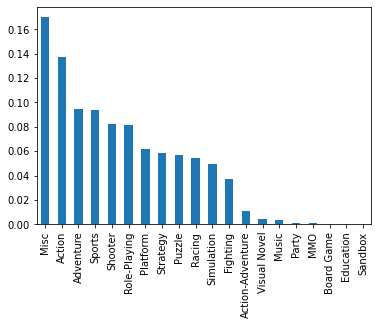

In [196]:
# what percentage of this data set consists of games from the "action" genre 
# make a bar plot of the percentages of genres in df 

df['Genre'].value_counts(normalize = True).plot(kind = 'bar')

In [197]:
# show the rows where publisher is not NA but developer is NA 

df.loc[(df['Publisher'] != np.nan )& ( df['Developer'].isna())] 

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
10839,10840,Gourmet Chef: Cook Your Way to Fame,Misc,E,DS,Ubisoft,NaN,NaN,NaN,0.14,0.13,NaN,NaN,0.01,2008.0
12704,12705,Wordmaster,Strategy,E,DS,"Destination Software, Inc",NaN,NaN,NaN,0.09,0.09,0.0,NaN,0.01,2008.0
20694,20695,SAS: Secure Tomorrow,Shooter,NaN,PC,City Interactive,NaN,NaN,NaN,0.00,NaN,0.0,NaN,0.00,2008.0
21227,21228,My Baby and Me,Misc,E,Wii,Unknown,NaN,NaN,NaN,0.00,NaN,0.0,NaN,NaN,NaN
21724,21725,Abandoner,Adventure,NaN,PC,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.0
25170,25171,Bounty Hunter,Action,NaN,PC,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.0
29414,29415,Duludubi Star,Platform,NaN,PC,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
30941,30942,Finkles Adventure,Puzzle,NaN,Wii,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0
33465,33466,Hidden Mysteries: Buckingham Palace,Puzzle,E,PC,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0
34414,34415,istanbul Beyleri,Fighting,NaN,PC,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           55792 non-null  int64  
 1   Name           55792 non-null  object 
 2   Genre          55792 non-null  object 
 3   ESRB_Rating    23623 non-null  object 
 4   Platform       55792 non-null  object 
 5   Publisher      55792 non-null  object 
 6   Developer      55775 non-null  object 
 7   Critic_Score   6536 non-null   float64
 8   User_Score     335 non-null    float64
 9   Total_Shipped  1827 non-null   float64
 10  Global_Sales   19415 non-null  float64
 11  NA_Sales       12964 non-null  float64
 12  PAL_Sales      13189 non-null  float64
 13  JP_Sales       7043 non-null   float64
 14  Other_Sales    15522 non-null  float64
 15  Year           54813 non-null  float64
dtypes: float64(9), int64(1), object(6)
memory usage: 6.8+ MB


In [162]:
# drop all missing rows from the year column 

df.dropna(subset = ['Year'],inplace = True)

In [141]:
# imput missing critic score values with the average critic score 

df[['Critic_Score']]= df[['Critic_Score']].fillna(df['Critic_Score'].mean())


In [205]:
## make a line plot for the numer of video games shipped per year

import plotly.express as px 
linedf = df.groupby('Year').sum().reset_index()

px.line(linedf,x= 'Year' , y='Total_Shipped', title= 'total video games shipped per year')


In [ ]:
# which year had the most video game sales?? 